In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
#os.chdir('/'.join(os.getcwd().split('/')[:-1]))
kernel_is_loaded = True

In [2]:
print(os.getcwd())

C:\Users\abhij\OneDrive\Desktop\Wadhwani\Working_with_shp_files


In [3]:
df=pd.read_csv("./crop_spectral_library_csv.csv",on_bad_lines='skip')

In [4]:
df.head()

,latitude,longitude,state,district,taluka,sowing_period,year,crop_name,ndvi_capture_period,ndvi_value,location,ndvi_capture_date,interval_range,sowing_year,sowing_date,harvest_yr,harvest_period,one
0,22.749243,76.285961,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,181.0,0101000020E6100000733CB02D4D1253406DBE5B6ACEBF...,0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
1,22.823677,75.178438,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,191.0,0101000020E61000007C37CC866BCB52407DF8437DDCD2...,0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
2,22.823894,75.178496,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,191.0,0101000020E610000040BDBE7B6CCB524011E335AFEAD2...,0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
3,23.746600,78.178934,Madhya Pradesh,VIDESHA,NaN,oct_2f,2023,Wheat,jan_1f,188.0,0101000020E6100000480845A9738B5340E32FD23021BF...,0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
4,22.521601,75.397578,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,195.0,0101000020E6100000EFC517ED71D95240C713419C8785...,0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397031 entries, 0 to 397030
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   latitude             397031 non-null  float64
 1   longitude            397031 non-null  float64
 2   state                397031 non-null  object 
 3   district             397031 non-null  object 
 4   taluka               0 non-null       float64
 5   sowing_period        397031 non-null  object 
 6   year                 397031 non-null  int64  
 7   crop_name            397031 non-null  object 
 8   ndvi_capture_period  397031 non-null  object 
 9   ndvi_value           198515 non-null  float64
 10  location             397031 non-null  object 
 11  ndvi_capture_date    397031 non-null  object 
 12  interval_range       397031 non-null  object 
 13  sowing_year          397031 non-null  object 
 14  sowing_date          397031 non-null  int64  
 15  harvest_yr       

In [6]:
import geopandas as gpd
from shapely.geometry import Point

# Convert longitude and latitude to a geometric Point object
df['location'] = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='location')

In [7]:
gdf.head()

,latitude,longitude,state,district,taluka,sowing_period,year,crop_name,ndvi_capture_period,ndvi_value,location,ndvi_capture_date,interval_range,sowing_year,sowing_date,harvest_yr,harvest_period,one
0,22.749243,76.285961,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,181.0,POINT (76.28596 22.74924),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
1,22.823677,75.178438,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,191.0,POINT (75.17844 22.82368),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
2,22.823894,75.178496,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,191.0,POINT (75.17850 22.82389),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
3,23.746600,78.178934,Madhya Pradesh,VIDESHA,NaN,oct_2f,2023,Wheat,jan_1f,188.0,POINT (78.17893 23.74660),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f
4,22.521601,75.397578,Madhya Pradesh,DHAR,NaN,oct_2f,2023,Wheat,jan_1f,195.0,POINT (75.39758 22.52160),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,15-10-2022,2023,feb_1f


<Axes: >

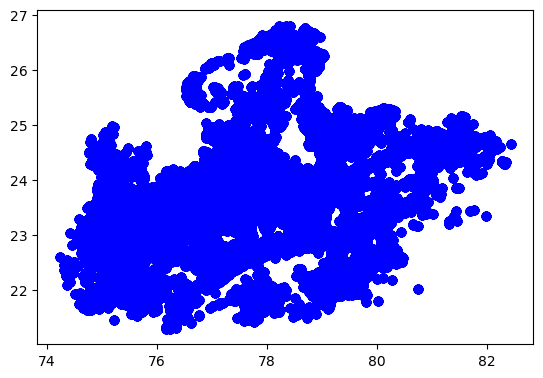

In [8]:
fig, ax = plt.subplots()

# Plot points
gdf.plot(ax=ax, color='blue')

In [10]:
shp_file=gpd.read_file("./sub-district/SUBDISTRICT_BOUNDARY.shp")

In [13]:
shp_file.head()

,District,STATE,TEHSIL,Shape_Leng,Shape_Area,test,Dist_1,Tehsil_1,geometry
0,BIL>SPUR,HIMACHAL PRADESH,BHARARI,50253.228763,9.000306e+07,BHARARI,BILASPUR,BHARARI,"POLYGON ((3690806.890 4831388.917, 3690871.421..."
1,BIL>SPUR,HIMACHAL PRADESH,BIL>SPUR,93446.685818,1.703525e+08,BILASPUR,BILASPUR,BILASPUR,"POLYGON ((3699861.726 4812292.061, 3699965.144..."
2,BIL>SPUR,HIMACHAL PRADESH,GHURMW|N,105834.665205,1.906542e+08,GHURMW|N,BILASPUR,GHURMWIN,"POLYGON ((3692609.535 4827764.245, 3692614.853..."
3,BIL>SPUR,HIMACHAL PRADESH,JHAND@TA,112831.475031,3.205376e+08,JHANDUTA,BILASPUR,JHANDUTA,"POLYGON ((3667564.424 4819909.775, 3667603.174..."
4,BIL>SPUR,HIMACHAL PRADESH,NAMHOL,61752.616994,1.034979e+08,NAMHOL,BILASPUR,NAMHOL,"POLYGON ((3701617.644 4803943.439, 3701666.832..."


<Axes: >

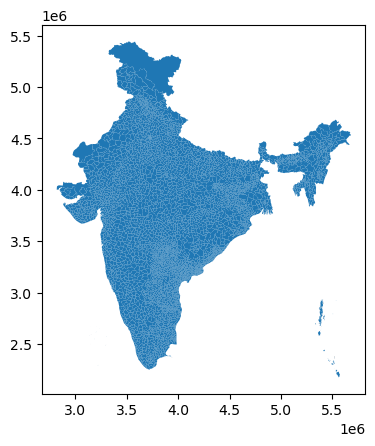

In [14]:
shp_file.plot()

In [15]:
latlong_with_talukas=gpd.sjoin(gdf,shp_file,how='inner',op='within')

C:\Users\abhij\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\abhij\AppData\Local\Temp\ipykernel_4696\3021117416.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...

  latlong_with_talukas=gpd.sjoin(gdf,shp_file,how='inner',op='within')


In [16]:
gdf.crs

In [17]:
shp_file.crs

<Projected CRS: PROJCS["LCC_WGS84",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: LCC_WGS84
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdf.crs = "epsg:4326"
gdf.to_crs("WGS84",inplace=True)

In [19]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
shp_file.to_crs("WGS84",inplace=True)

In [21]:
shp_file.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
latlong_with_talukas=gpd.sjoin(gdf,shp_file,how='inner',op='within')

C:\Users\abhij\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [28]:
latlong_with_talukas.head()

,latitude,longitude,state,district,taluka,sowing_period,year,crop_name,ndvi_capture_period,ndvi_value,...,one,index_right,District,STATE,TEHSIL,Shape_Leng,Shape_Area,test,Dist_1,Tehsil
0,22.749243,76.285961,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,181.0,...,feb_1f,2669,DEWAS,MADHYA PRADESH,BAGLI,388422.958635,1.863153e+09,BAGLI,DEWAS,BAGLI
25,22.756994,76.252588,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,180.0,...,feb_1f,2669,DEWAS,MADHYA PRADESH,BAGLI,388422.958635,1.863153e+09,BAGLI,DEWAS,BAGLI
40,22.674901,76.269824,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,177.0,...,feb_1f,2669,DEWAS,MADHYA PRADESH,BAGLI,388422.958635,1.863153e+09,BAGLI,DEWAS,BAGLI
55,22.772844,76.243290,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,191.0,...,feb_2f,2669,DEWAS,MADHYA PRADESH,BAGLI,388422.958635,1.863153e+09,BAGLI,DEWAS,BAGLI
86,22.791621,76.322957,Madhya Pradesh,DEWAS,NaN,oct_2f,2023,Wheat,jan_1f,176.0,...,feb_2f,2669,DEWAS,MADHYA PRADESH,BAGLI,388422.958635,1.863153e+09,BAGLI,DEWAS,BAGLI


In [43]:
latlong_with_talukas.drop(['harvest_yr'],axis=1,inplace=True)

In [44]:
latlong_with_talukas.rename(columns = {'harvest_period':'harvest_yr'}, inplace = True)

In [46]:
latlong_with_talukas

,latitude,longitude,state,district,sowing_period,year,crop_name,ndvi_capture_period,ndvi_value,location,ndvi_capture_date,interval_range,sowing_year,sowing_date,harvest_yr,harvest_yr,Tehsil
0,22.749243,76.285961,Madhya Pradesh,DEWAS,oct_2f,2023,Wheat,jan_1f,181.0,POINT (76.28596 22.74924),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,2023,feb_1f,BAGLI
25,22.756994,76.252588,Madhya Pradesh,DEWAS,oct_2f,2023,Wheat,jan_1f,180.0,POINT (76.25259 22.75699),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,2023,feb_1f,BAGLI
40,22.674901,76.269824,Madhya Pradesh,DEWAS,oct_2f,2023,Wheat,jan_1f,177.0,POINT (76.26982 22.67490),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,2023,feb_1f,BAGLI
55,22.772844,76.243290,Madhya Pradesh,DEWAS,oct_2f,2023,Wheat,jan_1f,191.0,POINT (76.24329 22.77284),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,2023,feb_2f,BAGLI
86,22.791621,76.322957,Madhya Pradesh,DEWAS,oct_2f,2023,Wheat,jan_1f,176.0,POINT (76.32296 22.79162),0001-01-01 BC,"['0001-01-01 BC'""","'""0001-01-14 BC'"")""",2022,2023,feb_2f,BAGLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396967,26.534927,78.846269,Madhya Pradesh,BHIND,nov_1f,2022,Wheat,dec_2f,186.0,POINT (78.84627 26.53493),0001-12-15 BC,"['0001-12-15 BC'""","'""0001-12-31 BC'"")""",2022,2023,mar_1f,BHIND
396979,26.534927,78.846269,Madhya Pradesh,BHIND,nov_1f,2022,Wheat,dec_2f,186.0,POINT (78.84627 26.53493),0001-12-15 BC,"['0001-12-15 BC'""","'""0001-12-31 BC'"")""",2022,2023,mar_1f,BHIND
396984,26.595485,78.975319,Madhya Pradesh,BHIND,nov_1f,2022,Wheat,dec_2f,173.0,POINT (78.97532 26.59549),0001-12-15 BC,"['0001-12-15 BC'""","'""0001-12-31 BC'"")""",2022,2023,mar_1f,BHIND
396989,26.509309,78.716783,Madhya Pradesh,BHIND,nov_1f,2022,Wheat,dec_2f,174.0,POINT (78.71678 26.50931),0001-12-15 BC,"['0001-12-15 BC'""","'""0001-12-31 BC'"")""",2022,2023,mar_1f,BHIND


In [47]:

# Specify the path where you want to save the CSV file
output_csv_path = "crop_spectral_library_with_Tehsil_csv_1.csv"

# Write the GeoPandas DataFrame to the CSV file
latlong_with_talukas.to_csv(output_csv_path, index=False)

In [48]:
gdf.info

<bound method DataFrame.info of          latitude  longitude           state    district  taluka  \
0       22.749243  76.285961  Madhya Pradesh       DEWAS     NaN   
1       22.823677  75.178438  Madhya Pradesh        DHAR     NaN   
2       22.823894  75.178496  Madhya Pradesh        DHAR     NaN   
3       23.746600  78.178934  Madhya Pradesh     VIDESHA     NaN   
4       22.521601  75.397578  Madhya Pradesh        DHAR     NaN   
...           ...        ...             ...         ...     ...   
397026  24.458376  77.700912  Madhya Pradesh  ASHOKNAGAR     NaN   
397027  25.099727  78.166021  Madhya Pradesh    SHIVPURI     NaN   
397028  24.591280  77.726411  Madhya Pradesh  ASHOKNAGAR     NaN   
397029  24.002468  76.966493  Madhya Pradesh     RAJGARH     NaN   
397030  24.468342  77.542674  Madhya Pradesh  ASHOKNAGAR     NaN   

       sowing_period  year crop_name ndvi_capture_period  ndvi_value  \
0             oct_2f  2023     Wheat              jan_1f       181.0   
1      

In [49]:
latlong_with_talukas.info

<bound method DataFrame.info of          latitude  longitude           state district sowing_period  year  \
0       22.749243  76.285961  Madhya Pradesh    DEWAS        oct_2f  2023   
25      22.756994  76.252588  Madhya Pradesh    DEWAS        oct_2f  2023   
40      22.674901  76.269824  Madhya Pradesh    DEWAS        oct_2f  2023   
55      22.772844  76.243290  Madhya Pradesh    DEWAS        oct_2f  2023   
86      22.791621  76.322957  Madhya Pradesh    DEWAS        oct_2f  2023   
...           ...        ...             ...      ...           ...   ...   
396967  26.534927  78.846269  Madhya Pradesh    BHIND        nov_1f  2022   
396979  26.534927  78.846269  Madhya Pradesh    BHIND        nov_1f  2022   
396984  26.595485  78.975319  Madhya Pradesh    BHIND        nov_1f  2022   
396989  26.509309  78.716783  Madhya Pradesh    BHIND        nov_1f  2022   
396992  26.608412  78.715021  Madhya Pradesh    BHIND        nov_1f  2022   

       crop_name ndvi_capture_period  ndvi_